In [77]:
library(fpp)
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [24]:
df = read.csv(gzfile('../taxi/anomaly-detection-data/taxi_tripcount_per_hour_7yrs.csv.gz','rt'))
df$datetime = ISOdatetime(year = df$Year,month = df$Month,day = df$Day, hour = df$Hour,min = 0,sec = 0)
taxi <- xts(df$Count,order.by = df$datetime)
colnames(taxi) <- c('trip_count')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“seek on a gzfile connection returned an internal error”Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“seek on a gzfile connection returned an internal error”Warning message:
“closing unused connection 4 (../taxi/anomaly-detection-data/taxi_tripcount_per_hour_7yrs.csv.gz)”

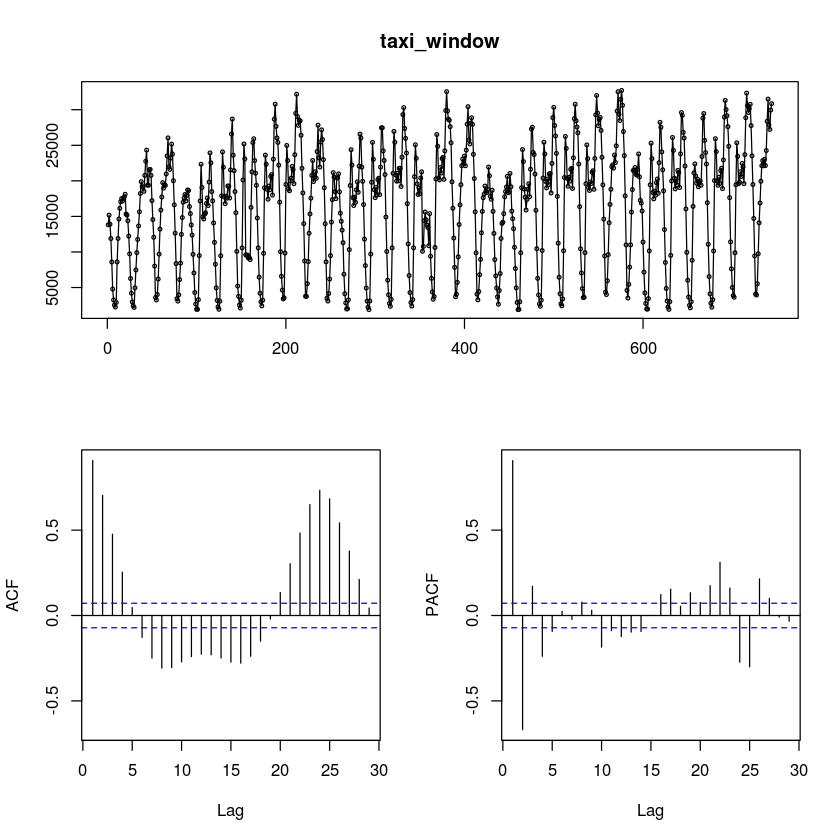

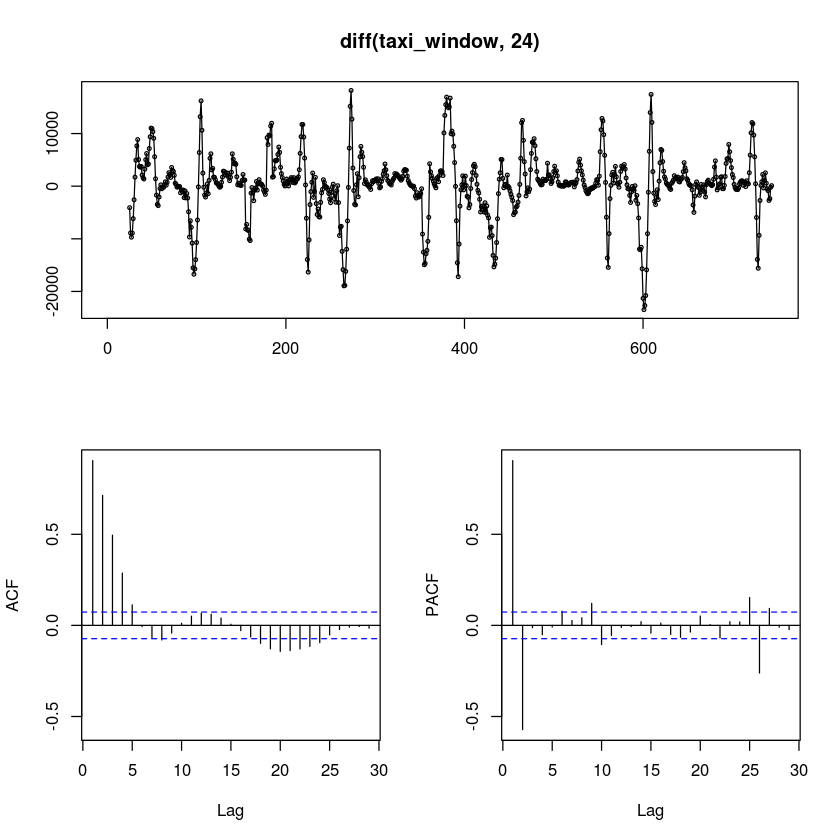

In [94]:
#taxi_window <- taxi[c('2009-01','2009-02')]
taxi_window <- taxi[c('2009-01')]
tsdisplay(taxi_window,)
tsdisplay(diff(taxi_window,24))

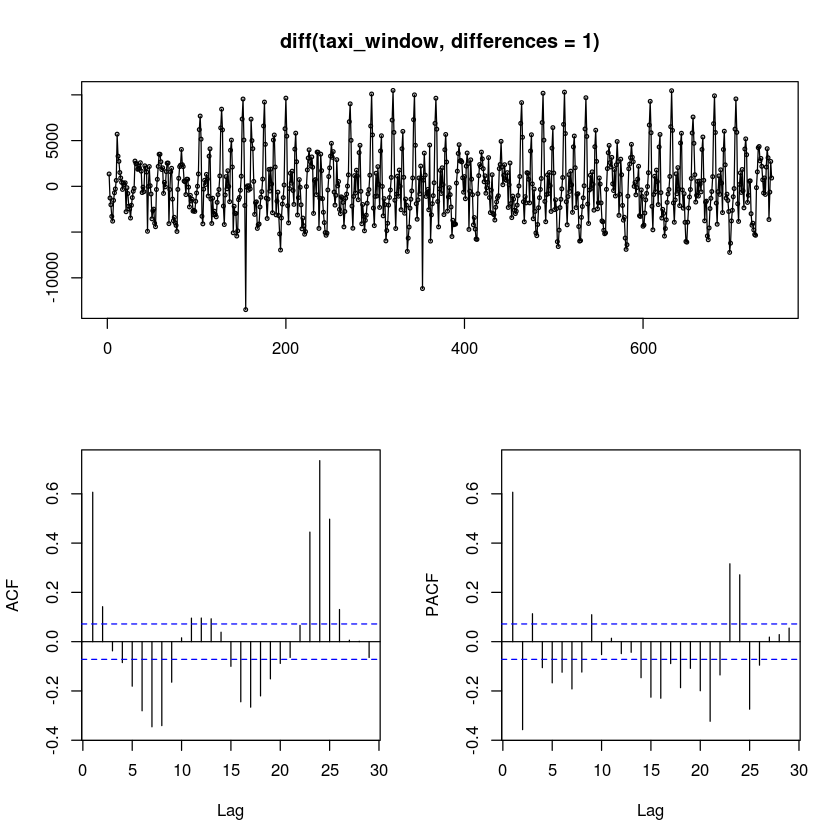

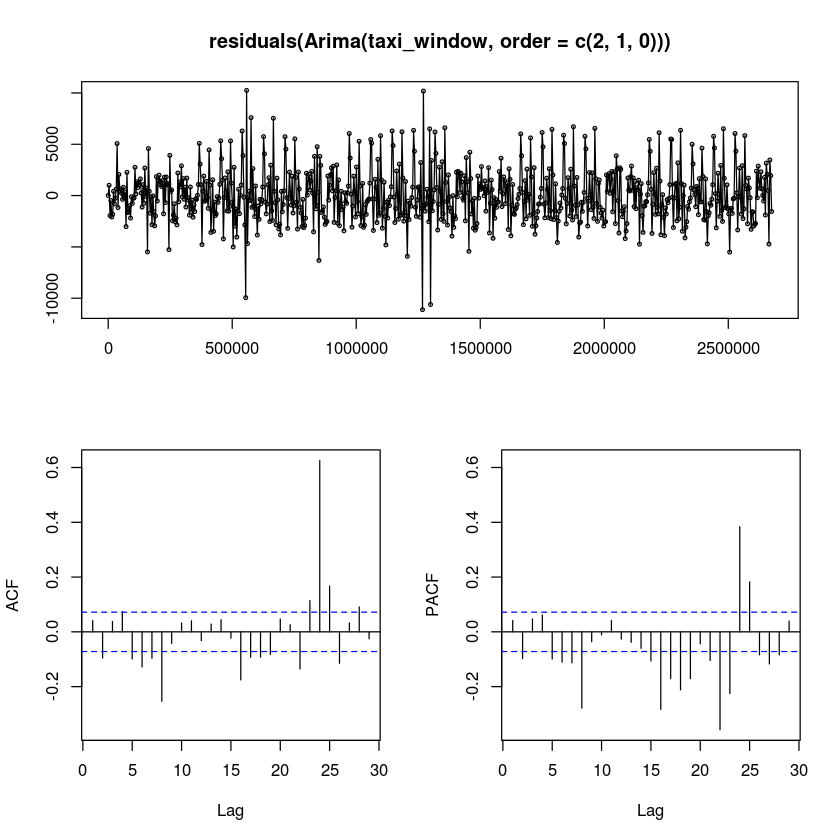

Series: taxi_window 
ARIMA(2,1,0)(0,1,1)[24]                    

Coefficients:
         ar1      ar2     sma1
      0.6921  -0.2150  -0.9223
s.e.  0.0366   0.0366   0.0313

sigma^2 estimated as 3333736:  log likelihood=-6441.24
AIC=12890.48   AICc=12890.53   BIC=12908.79

Training set error measures:
                   ME     RMSE      MAE    MPE     MAPE       MASE        ACF1
Training set 3.119021 1791.165 1300.471 1.5616 12.28542 0.07782398 -0.01878745


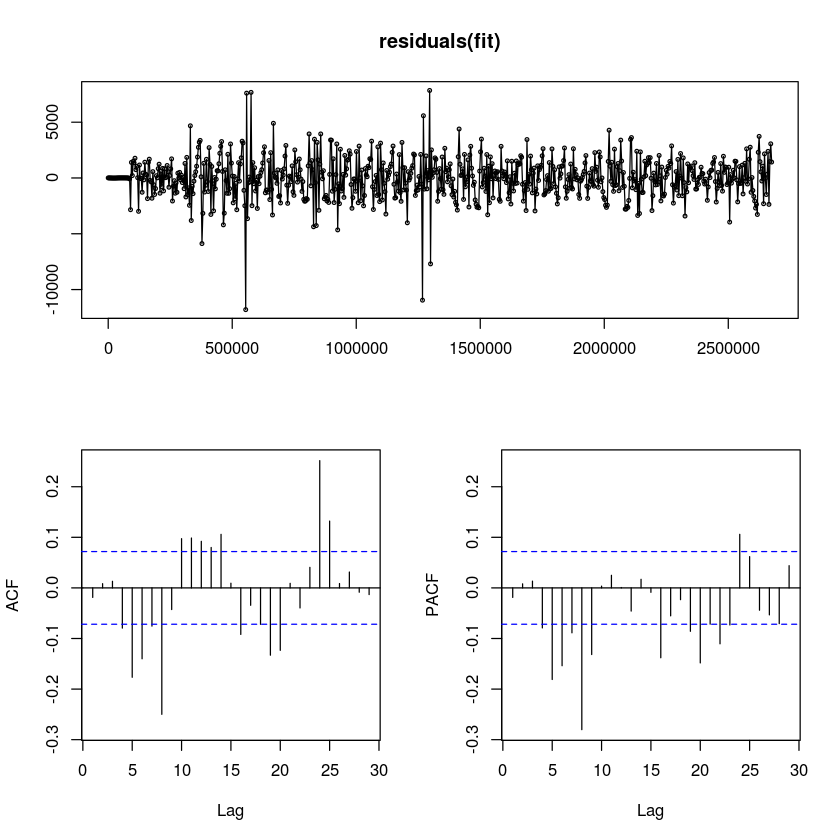

In [124]:
tsdisplay(diff(taxi_window,differences = 1))
tsdisplay(residuals(Arima(taxi_window,order = c(2,1,0))))

####
fit <- Arima(taxi_window,order = c(2,1,0),
                          seasonal = list(order=c(0,1,1),period=24))
tsdisplay(residuals(fit))
summary(fit)

#tsdisplay(diff(taxi_window,differences = 2))

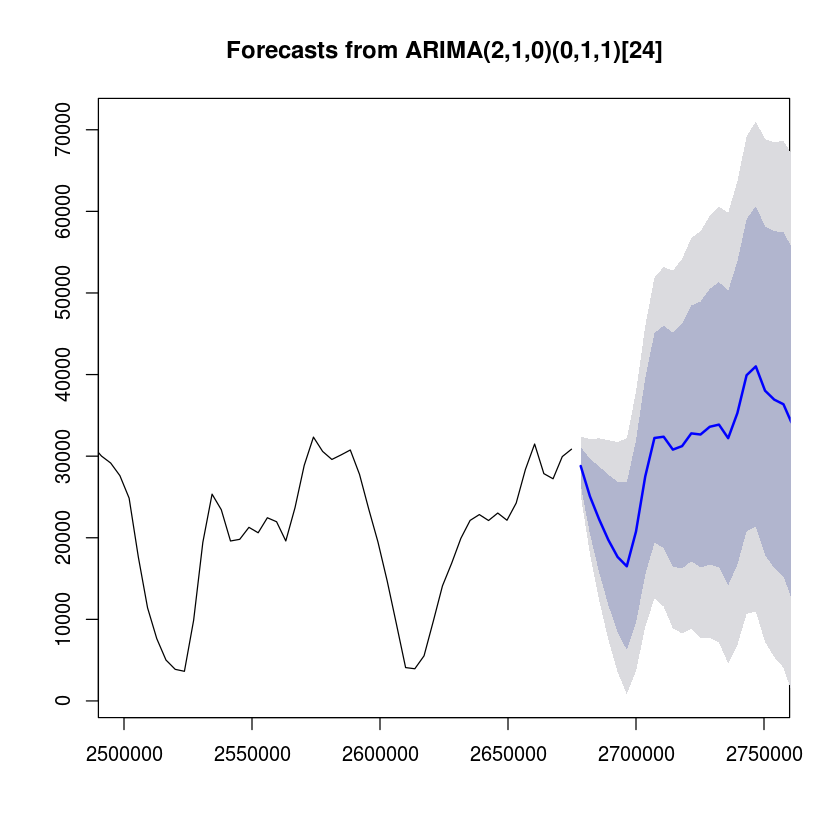

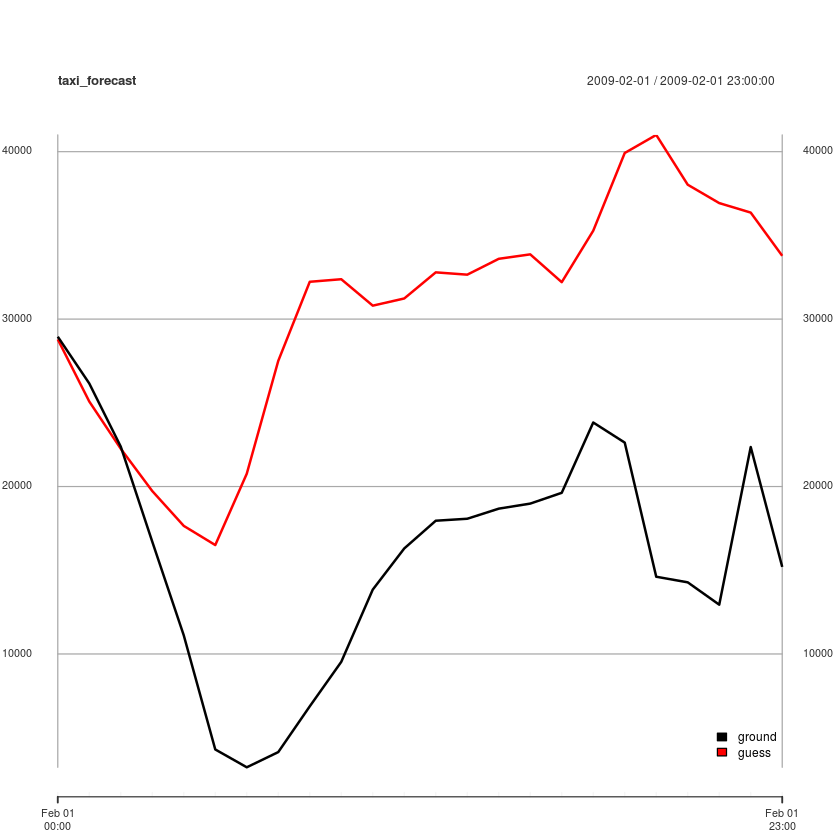

In [246]:
fc = forecast(fit,h=24)
plot(fc,xlim = c(2500000,2750000))

taxi_predict <- 
# taxi_forecast <- xts(x = cbind(taxi['2009-02-01'],fc$mean,fc$lower,fc$upper),
#                      order.by = time(taxi_predict))
# colnames(taxi_forecast)=c('ground','guess',
#                          'l85','l95',
#                          'u85','u95')
taxi_forecast <- xts(x = cbind(taxi['2009-02-01'],fc$mean),
                     order.by = time(taxi_predict))
colnames(taxi_forecast)=c('ground','guess')
plot.xts(taxi_forecast,legend.loc = 'bottomright')

Series: taxi_window 
ARIMA(2,1,0)(0,1,1)[168]                    

Coefficients:
         ar1      ar2     sma1
      0.4245  -0.1386  -0.5011
s.e.  0.0418   0.0418   0.0668

sigma^2 estimated as 2280060:  log likelihood=-5051.25
AIC=10110.5   AICc=10110.57   BIC=10127.92

Training set error measures:
                   ME    RMSE      MAE        MPE     MAPE       MASE
Training set 3.853668 1323.99 738.6336 0.02985344 5.679693 0.04420199
                   ACF1
Training set -0.0111579


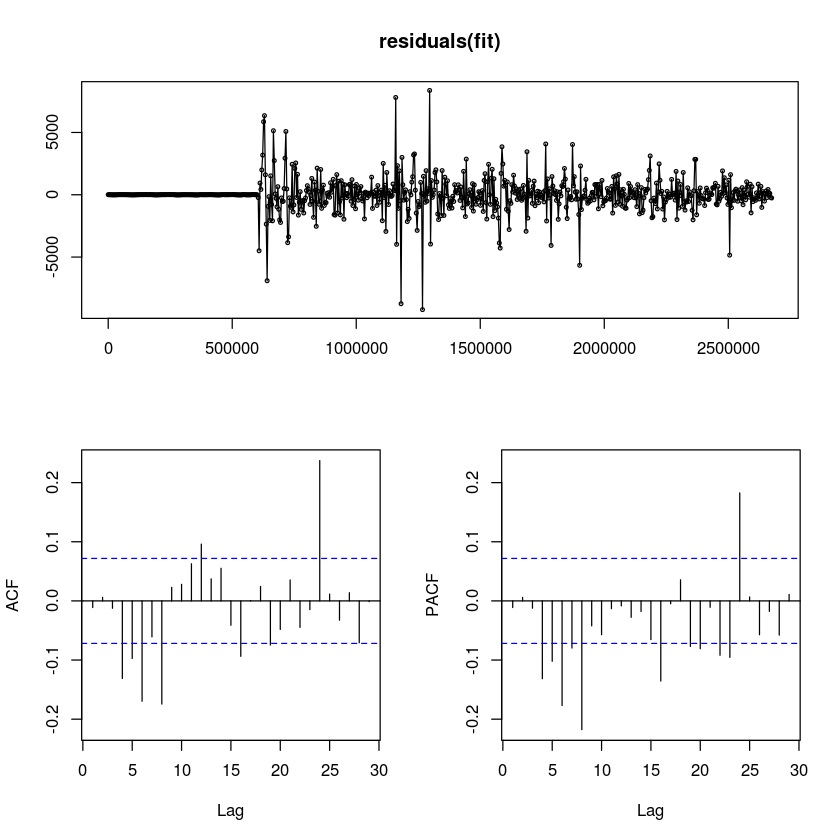

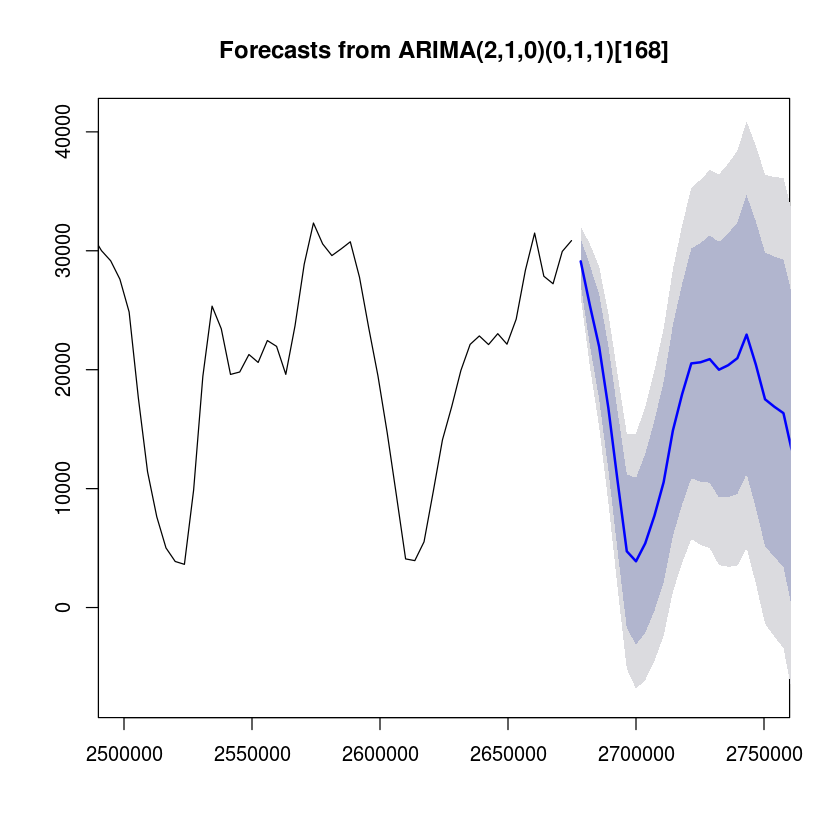

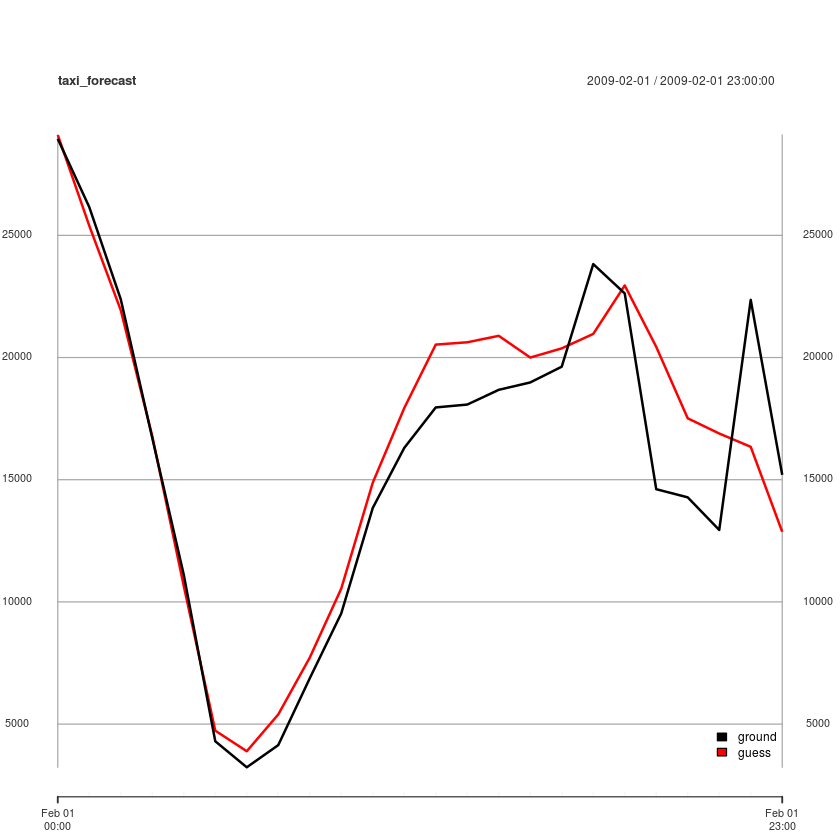

In [249]:
####
fit <- Arima(taxi_window,order = c(2,1,0),
                          seasonal = list(order=c(0,1,1),period=168))
tsdisplay(residuals(fit))
summary(fit)

fc = forecast(fit,h=24)
plot(fc,xlim = c(2500000,2750000))

taxi_forecast <- xts(x = cbind(taxi['2009-02-01'],fc$mean),
                     order.by = time(taxi_predict))
colnames(taxi_forecast)=c('ground','guess')
plot.xts(taxi_forecast,legend.loc = 'bottomright')


Series: taxi[seq(ISOdate(2009, 11, 20, 0), ISOdate(2009, 12, 20, 23),      "hour")] 
ARIMA(2,1,0)(0,1,1)[168]                    

Coefficients:
         ar1      ar2     sma1
      0.5507  -0.2071  -0.8536
s.e.  0.0410   0.0408   0.1963

sigma^2 estimated as 1492186:  log likelihood=-4990.61
AIC=9989.21   AICc=9989.28   BIC=10006.63

Training set error measures:
                  ME     RMSE      MAE      MPE     MAPE       MASE       ACF1
Training set 12.0743 1071.083 646.9565 0.250127 5.048005 0.03531193 -0.0133315


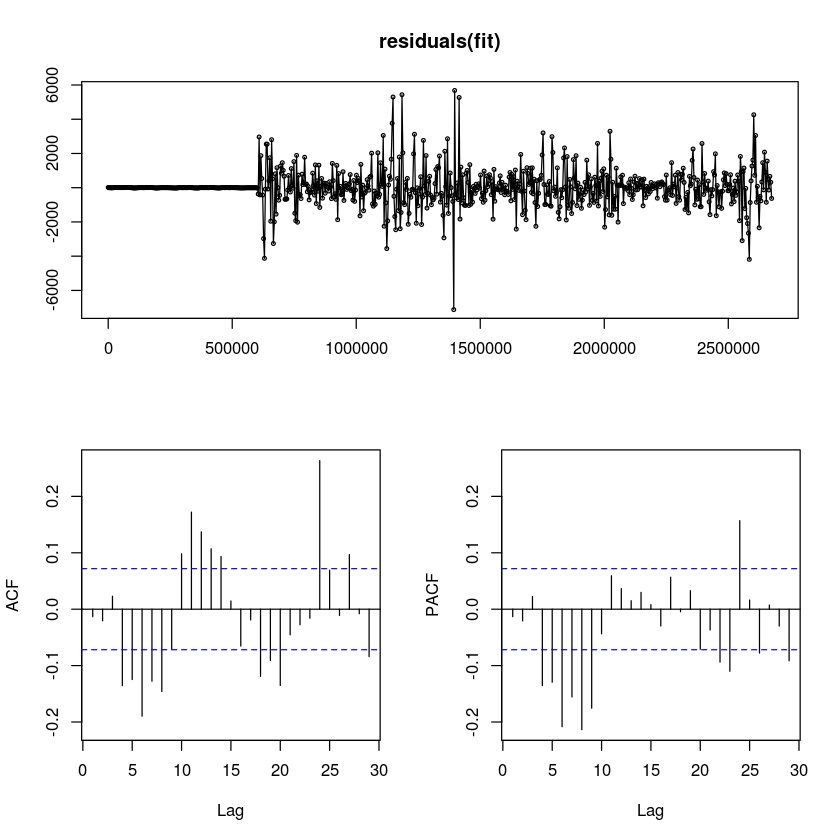

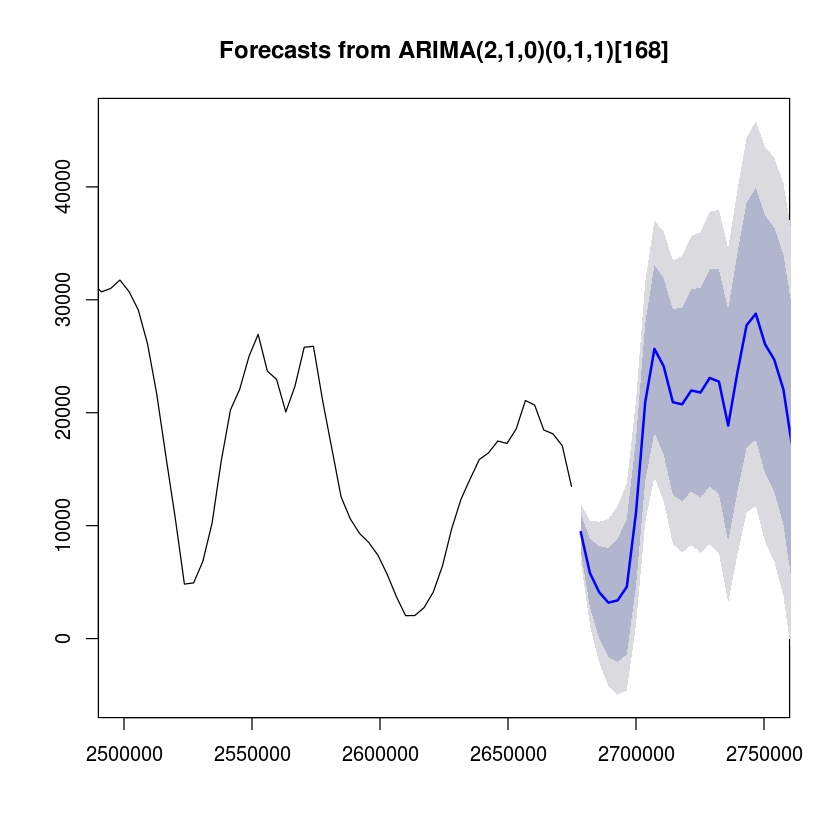

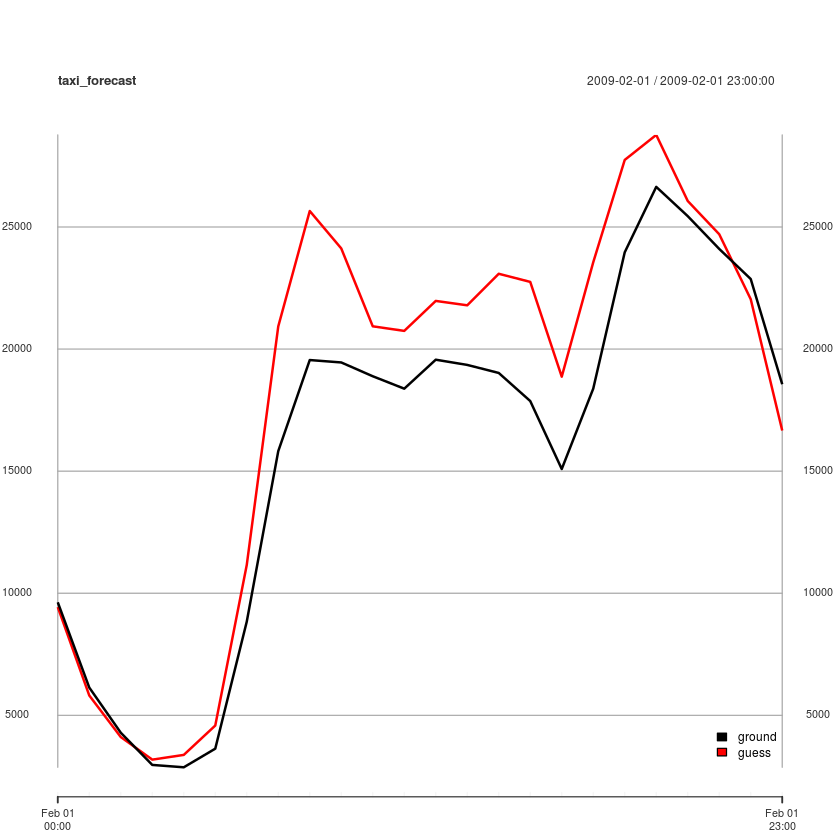

In [267]:
fit <- Arima(taxi[seq(ISOdate(2009,11,20,0),ISOdate(2009,12,20,23),"hour")]
             ,order = c(2,1,0),
             seasonal = list(order=c(0,1,1),period=168))
tsdisplay(residuals(fit))
summary(fit)

fc = forecast(fit,h=24)
plot(fc,xlim = c(2500000,2750000))

taxi_forecast <- xts(x = cbind(taxi['2009-12-21'],fc$mean),
                     order.by = time(taxi_predict))
colnames(taxi_forecast)=c('ground','guess')
plot.xts(taxi_forecast,legend.loc = 'bottomright')

Series: taxi[seq(ISOdate(2009, 11, 24, 0), ISOdate(2009, 12, 23, 23),      "hour")] 
ARIMA(2,1,0)(0,1,1)[168]                    

Coefficients:
         ar1      ar2     sma1
      0.5600  -0.2144  -0.7505
s.e.  0.0426   0.0418   0.1868

sigma^2 estimated as 1717952:  log likelihood=-4801.28
AIC=9610.55   AICc=9610.62   BIC=9627.8

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE       MASE
Training set -5.070751 1143.482 691.9632 -0.07850622 5.019597 0.03820857
                     ACF1
Training set -0.006080856


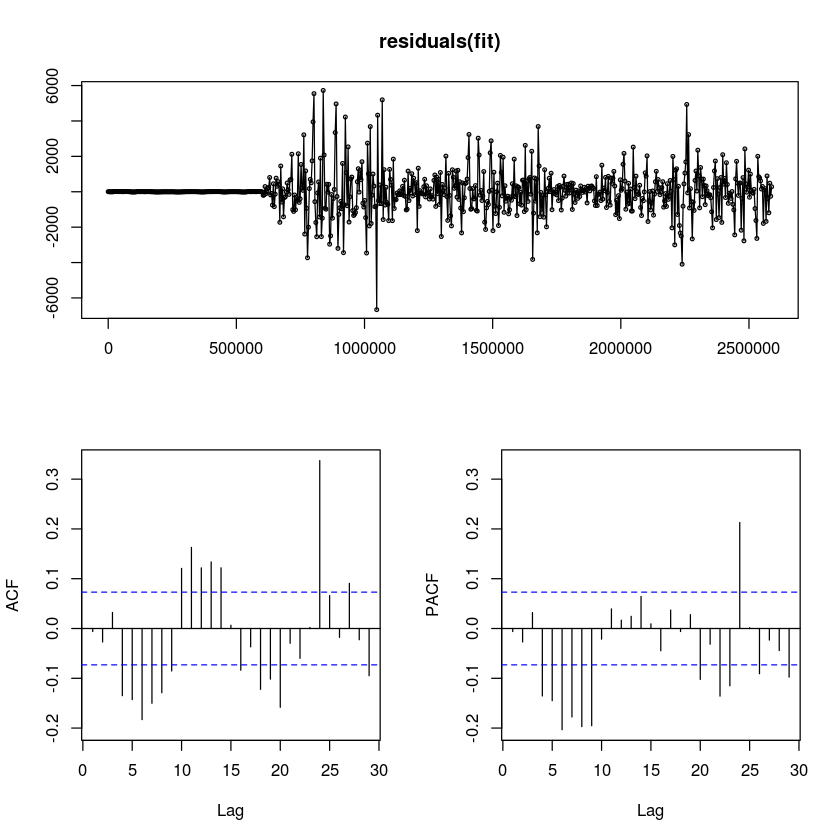

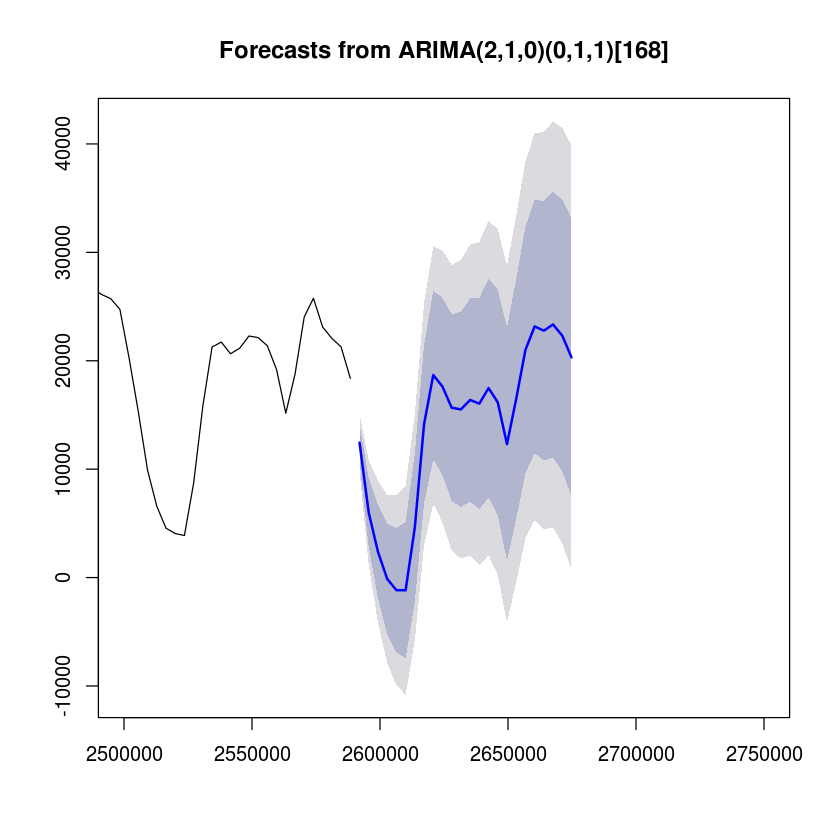

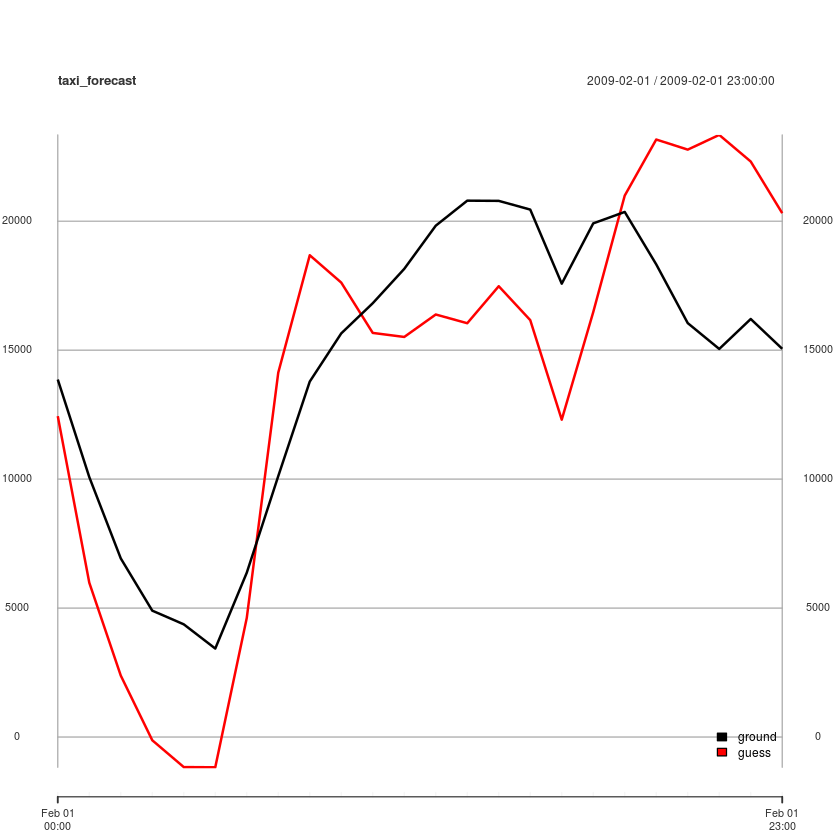

In [266]:
fit <- Arima(taxi[seq(ISOdate(2009,11,24,0),ISOdate(2009,12,23,23),"hour")]
             ,order = c(2,1,0),
             seasonal = list(order=c(0,1,1),period=168))
tsdisplay(residuals(fit))
summary(fit)

fc = forecast(fit,h=24)
plot(fc,xlim = c(2500000,2750000))

taxi_forecast <- xts(x = cbind(taxi['2009-12-24'],fc$mean),
                     order.by = time(taxi_predict))
colnames(taxi_forecast)=c('ground','guess')
plot.xts(taxi_forecast,legend.loc = 'bottomright')